### Importing libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

import statistics
from statistics import median, median_grouped, median_high,median_low

from scipy.stats import skew, norm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)  
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)
#pd.set_option('display.max_rows',None)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import StackingClassifier


### Reading datasets

In [2]:
Train = pd.read_csv('Train.csv', parse_dates = ['Registration_Date'])
Test = pd.read_csv('test.csv', parse_dates = ['Registration_Date'])

FHCA = pd.read_csv('First_Health_Camp_Attended.csv')
SHCA = pd.read_csv('Second_Health_Camp_Attended.csv')
THCA = pd.read_csv('Third_Health_Camp_Attended.csv')

health_camp_detail = pd.read_csv('Health_Camp_Detail.csv', parse_dates = ['Camp_Start_Date', 'Camp_End_Date'] )
patient_profile = pd.read_csv('Patient_Profile.csv', na_values = 'None',  parse_dates = ['First_Interaction'])

submission = pd.read_csv('sample_submmission.csv')

### Taking a look through datasets

In [3]:
Train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,2005-09-10,4,0,0,0,2
1,507246,6578,2005-08-18,45,5,0,0,7
2,523729,6534,2006-04-29,0,0,0,0,0
3,524931,6535,2004-02-07,0,0,0,0,0
4,521364,6529,2006-02-28,15,1,0,0,7
...,...,...,...,...,...,...,...,...
75273,500969,6539,2005-01-03,0,0,0,0,0
75274,511952,6528,2006-02-13,0,0,0,0,0
75275,521236,6554,2005-05-24,0,0,0,0,0
75276,518817,6580,2004-12-22,0,0,0,0,0


In [4]:
Test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,2006-05-21,1,0,0,0,2
1,500633,6584,2006-06-02,0,0,0,0,0
2,506945,6582,2006-08-10,0,0,0,0,0
3,497447,6551,2006-08-27,0,0,0,0,0
4,496446,6533,2006-09-19,0,0,0,0,0
...,...,...,...,...,...,...,...,...
35244,507261,6525,2006-04-13,12,2,0,0,6
35245,513607,6551,2006-11-03,0,0,0,0,0
35246,498160,6584,2006-06-17,0,0,0,0,0
35247,502444,6567,2007-01-13,0,0,0,0,0


In [5]:
FHCA

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN
...,...,...,...,...,...
6213,502728,6575,10,0.509804,NaN
6214,511088,6575,20,0.078431,NaN
6215,507608,6575,40,0.627451,NaN
6216,488046,6575,50,0.686275,NaN


In [6]:
SHCA

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712
...,...,...,...
7814,490853,6529,0.103136
7815,499836,6529,0.507841
7816,511286,6529,0.627865
7817,522935,6529,0.252714


In [7]:
THCA

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2
...,...,...,...,...
6510,503791,6527,3,3
6511,517319,6528,1,3
6512,517319,6578,4,3
6513,517319,6527,4,4


In [8]:
health_camp_detail

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,2003-08-16,2003-08-20,First,B,2
1,6530,2003-08-16,2003-10-28,First,C,2
2,6544,2003-11-03,2003-11-15,First,F,1
3,6585,2003-11-22,2003-12-05,First,E,2
4,6561,2003-11-30,2003-12-18,First,E,1
...,...,...,...,...,...,...
60,6556,2006-11-09,2006-12-15,First,E,2
61,6551,2006-11-13,2006-11-18,Second,D,2
62,6559,2006-12-11,2007-03-12,First,F,2
63,6567,2007-01-30,2007-02-04,Second,D,2


In [9]:
patient_profile

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,2003-06-18,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,2003-07-20,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,2002-11-02,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,2002-11-02,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,2002-11-24,H,Others
...,...,...,...,...,...,...,...,...,...,...,...
37628,518600,0,0,0,0,NaN,NaN,NaN,2007-01-28,NaN,NaN
37629,509515,0,0,0,0,NaN,NaN,NaN,2007-01-27,NaN,NaN
37630,510713,0,0,0,0,NaN,NaN,NaN,2007-02-01,H,NaN
37631,493667,0,0,0,0,NaN,NaN,NaN,2007-01-27,NaN,NaN


In [10]:
patient_profile.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,37633.0,507148.408338,12411.747993,485678.0,496393.0,507104.0,517882.0,528657.0
Online_Follower,37633.0,0.022533,0.148412,0.0,0.0,0.0,0.0,1.0
LinkedIn_Shared,37633.0,0.027077,0.162311,0.0,0.0,0.0,0.0,1.0
Twitter_Shared,37633.0,0.021603,0.145387,0.0,0.0,0.0,0.0,1.0
Facebook_Shared,37633.0,0.023543,0.151623,0.0,0.0,0.0,0.0,1.0
Income,4362.0,1.077717,1.332109,0.0,0.0,1.0,2.0,6.0
Education_Score,1384.0,78.231288,8.751698,45.0,72.0,79.0,85.0,101.0
Age,5015.0,49.129811,12.555632,30.0,40.0,44.0,52.0,80.0


### Merging Datasets with Train & Test data

In [11]:
df1 = pd.merge(FHCA, SHCA, how = 'outer')

In [12]:
df1

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4,Health Score
0,506181,6560,40.0,0.439024,NaN,NaN
1,494977,6560,20.0,0.097561,NaN,NaN
2,518680,6560,10.0,0.048780,NaN,NaN
3,509916,6560,30.0,0.634146,NaN,NaN
4,488006,6560,20.0,0.024390,NaN,NaN
...,...,...,...,...,...,...
14032,490853,6529,NaN,NaN,NaN,0.103136
14033,499836,6529,NaN,NaN,NaN,0.507841
14034,511286,6529,NaN,NaN,NaN,0.627865
14035,522935,6529,NaN,NaN,NaN,0.252714


In [13]:
df2 = pd.merge(df1, THCA, how='outer')

In [14]:
df2

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number
0,506181,6560,40.0,0.439024,NaN,NaN,NaN,NaN
1,494977,6560,20.0,0.097561,NaN,NaN,NaN,NaN
2,518680,6560,10.0,0.048780,NaN,NaN,NaN,NaN
3,509916,6560,30.0,0.634146,NaN,NaN,NaN,NaN
4,488006,6560,20.0,0.024390,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
20547,503791,6527,NaN,NaN,NaN,NaN,3.0,3.0
20548,517319,6528,NaN,NaN,NaN,NaN,1.0,3.0
20549,517319,6578,NaN,NaN,NaN,NaN,4.0,3.0
20550,517319,6527,NaN,NaN,NaN,NaN,4.0,4.0


In [15]:
df2['Patient_ID'].nunique()

11079

In [16]:
df2['Health_Camp_ID'].nunique()

44

In [17]:
df2['PHC_ID'] = df2[['Patient_ID', 'Health_Camp_ID']].astype(str).apply(lambda x: '-'.join(x), axis=1)

In [18]:
df2

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,PHC_ID
0,506181,6560,40.0,0.439024,NaN,NaN,NaN,NaN,506181-6560
1,494977,6560,20.0,0.097561,NaN,NaN,NaN,NaN,494977-6560
2,518680,6560,10.0,0.048780,NaN,NaN,NaN,NaN,518680-6560
3,509916,6560,30.0,0.634146,NaN,NaN,NaN,NaN,509916-6560
4,488006,6560,20.0,0.024390,NaN,NaN,NaN,NaN,488006-6560
...,...,...,...,...,...,...,...,...,...
20547,503791,6527,NaN,NaN,NaN,NaN,3.0,3.0,503791-6527
20548,517319,6528,NaN,NaN,NaN,NaN,1.0,3.0,517319-6528
20549,517319,6578,NaN,NaN,NaN,NaN,4.0,3.0,517319-6578
20550,517319,6527,NaN,NaN,NaN,NaN,4.0,4.0,517319-6527


In [19]:
df2['PHC_ID'].nunique()

20552

**df2 (FHCA + SHCA + THCA)**

In [20]:
df3 = pd.merge(Train, df2, how ='outer')

In [21]:
df3_test = pd.merge(Test, df2, how ='outer')

**df3 (Train + FHCA + SHCA + THCA)**

In [22]:
df3

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,PHC_ID
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,NaN,2.0,1.0,489652-6578
1,507246,6578,2005-08-18,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,523729,6534,2006-04-29,0,0,0,0,0,NaN,NaN,NaN,0.402054,NaN,NaN,523729-6534
3,524931,6535,2004-02-07,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,521364,6529,2006-02-28,15,1,0,0,7,NaN,NaN,NaN,0.845597,NaN,NaN,521364-6529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,500969,6539,2005-01-03,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75274,511952,6528,2006-02-13,0,0,0,0,0,NaN,NaN,NaN,NaN,2.0,1.0,511952-6528
75275,521236,6554,2005-05-24,0,0,0,0,0,20.0,0.927746,NaN,NaN,NaN,NaN,521236-6554
75276,518817,6580,2004-12-22,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**df3_test (Test + FHCA + SHCA + THCA)**

In [23]:
df3_test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,PHC_ID
0,505701,6548,2006-05-21,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500633,6584,2006-06-02,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,506945,6582,2006-08-10,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,497447,6551,2006-08-27,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,496446,6533,2006-09-19,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55796,503791,6527,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,503791-6527
55797,517319,6528,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,517319-6528
55798,517319,6578,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,517319-6578
55799,517319,6527,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,517319-6527


**df4 (Train + FHCA + SHCA + THCA + patient_profile)**

In [24]:
df4 = pd.merge(df3, patient_profile, how='inner')

In [25]:
df4_test = pd.merge(df3_test, patient_profile, how='inner')

In [26]:
df4

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,PHC_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,NaN,2.0,1.0,489652-6578,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN
1,489652,6532,2005-03-15,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN
2,489652,6543,2005-11-26,4,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN
3,489652,6580,2004-12-18,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN
4,489652,6570,2005-05-01,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,489743,6538,2004-07-31,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-07-15,NaN,NaN
75274,514807,6528,2006-04-24,0,0,0,0,0,NaN,NaN,NaN,NaN,2.0,1.0,514807-6528,0,0,0,0,NaN,NaN,NaN,2006-03-24,A,NaN
75275,522897,6529,2006-03-28,0,0,0,0,0,NaN,NaN,NaN,0.065742,NaN,NaN,522897-6529,0,0,0,0,NaN,NaN,NaN,2006-03-18,NaN,NaN
75276,527548,6529,2006-03-03,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2006-02-18,NaN,NaN


**df4_test (Test + FHCA + SHCA + THCA + patient_profile)**

In [27]:
df4_test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,PHC_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,505701,6548,2006-05-21,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN,44.0,2003-02-05,E,NaN
1,505701,6582,2006-04-06,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN,44.0,2003-02-05,E,NaN
2,505701,6556,2006-09-09,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN,44.0,2003-02-05,E,NaN
3,505701,6566,2006-02-15,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN,44.0,2003-02-05,E,NaN
4,505701,6567,2007-01-04,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN,44.0,2003-02-05,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55796,488675,6528,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,488675-6528,0,0,0,0,NaN,NaN,NaN,2006-04-11,E,NaN
55797,500374,6528,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,500374-6528,0,0,0,0,NaN,NaN,NaN,2006-04-13,NaN,NaN
55798,506643,6528,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,506643-6528,0,0,0,0,NaN,NaN,NaN,2006-04-13,NaN,NaN
55799,490945,6528,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,490945-6528,0,0,0,0,NaN,NaN,NaN,2006-04-12,C,NaN


**df5 (Train + FHCA + SHCA + THCA + patient_profile + health_camp_detail)**

In [28]:
df5 = pd.merge(df4, health_camp_detail, how = 'inner' )

In [29]:
df5_test = pd.merge(df4_test, health_camp_detail, how = 'inner' )

In [30]:
df5

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,PHC_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,NaN,2.0,1.0,489652-6578,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,2005-08-16,2005-10-14,Third,G,2
1,507246,6578,2005-08-18,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,2005-08-16,2005-10-14,Third,G,2
2,521364,6578,2005-10-11,15,1,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,2005-08-16,2005-10-14,Third,G,2
3,523001,6578,2005-09-02,0,0,0,0,0,NaN,NaN,NaN,NaN,5.0,1.0,523001-6578,0,0,0,0,NaN,NaN,NaN,2005-04-07,NaN,NaN,2005-08-16,2005-10-14,Third,G,2
4,501457,6578,2005-08-10,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN,NaN,2003-01-28,B,NaN,2005-08-16,2005-10-14,Third,G,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,501702,6563,2004-09-12,0,0,0,0,0,20.0,0.760684,NaN,NaN,NaN,NaN,501702-6563,0,0,0,0,NaN,NaN,NaN,2004-09-03,NaN,NaN,2004-09-09,2004-09-14,First,C,2
75274,525286,6563,2004-09-12,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-08-27,NaN,NaN,2004-09-09,2004-09-14,First,C,2
75275,527933,6563,2004-09-13,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-09-01,NaN,NaN,2004-09-09,2004-09-14,First,C,2
75276,489433,6563,2004-09-13,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2003-10-19,NaN,NaN,2004-09-09,2004-09-14,First,C,2


**df5_test (Test + FHCA + SHCA + THCA + patient_profile + health_camp_detail)**

In [31]:
df5_test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,PHC_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,505701,6548,2006-05-21,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN,44.0,2003-02-05,E,NaN,2006-06-13,2006-08-18,Third,G,2
1,500633,6548,2006-06-06,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1.0,67.00,41.0,2004-12-11,D,Consulting,2006-06-13,2006-08-18,Third,G,2
2,494067,6548,2006-07-19,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2006-07-19,B,NaN,2006-06-13,2006-08-18,Third,G,2
3,498974,6548,2006-06-29,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2.0,66.74,46.0,2004-11-08,B,Software Industry,2006-06-13,2006-08-18,Third,G,2
4,517714,6548,2006-06-17,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2005-02-09,B,NaN,2006-06-13,2006-08-18,Third,G,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55796,507138,6544,NaT,NaN,NaN,NaN,NaN,NaN,40.0,0.846154,NaN,NaN,NaN,NaN,507138-6544,0,0,0,0,NaN,NaN,NaN,2003-10-19,B,NaN,2003-11-03,2003-11-15,First,F,1
55797,488477,6544,NaT,NaN,NaN,NaN,NaN,NaN,20.0,1.000000,NaN,NaN,NaN,NaN,488477-6544,0,0,0,0,0.0,NaN,43.0,2003-10-22,F,BFSI,2003-11-03,2003-11-15,First,F,1
55798,499038,6544,NaT,NaN,NaN,NaN,NaN,NaN,20.0,0.461538,NaN,NaN,NaN,NaN,499038-6544,0,0,0,0,NaN,NaN,NaN,2003-10-24,NaN,NaN,2003-11-03,2003-11-15,First,F,1
55799,500721,6544,NaT,NaN,NaN,NaN,NaN,NaN,30.0,0.307692,NaN,NaN,NaN,NaN,500721-6544,0,0,0,0,NaN,NaN,NaN,2003-10-22,NaN,NaN,2003-11-03,2003-11-15,First,F,1


In [32]:
df5.to_csv('train_merge.csv', index = False)

In [33]:
df5_test.to_csv('test_merge.csv', index = False)

In [34]:
Train_data = pd.read_csv('train_merge.csv', na_values =[' '], parse_dates = ['Camp_Start_Date', 'Camp_End_Date',
                                                                      'Registration_Date', 'First_Interaction'])

In [35]:
Test = pd.read_csv('test_merge.csv', na_values =[' '], parse_dates = ['Camp_Start_Date', 'Camp_End_Date',
                                                                      'Registration_Date', 'First_Interaction'])

In [36]:
Train_data

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,PHC_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,NaN,2.0,1.0,489652-6578,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,2005-08-16,2005-10-14,Third,G,2
1,507246,6578,2005-08-18,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,2005-08-16,2005-10-14,Third,G,2
2,521364,6578,2005-10-11,15,1,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,2005-08-16,2005-10-14,Third,G,2
3,523001,6578,2005-09-02,0,0,0,0,0,NaN,NaN,NaN,NaN,5.0,1.0,523001-6578,0,0,0,0,NaN,NaN,NaN,2005-04-07,NaN,NaN,2005-08-16,2005-10-14,Third,G,2
4,501457,6578,2005-08-10,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN,NaN,2003-01-28,B,NaN,2005-08-16,2005-10-14,Third,G,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,501702,6563,2004-09-12,0,0,0,0,0,20.0,0.760684,NaN,NaN,NaN,NaN,501702-6563,0,0,0,0,NaN,NaN,NaN,2004-09-03,NaN,NaN,2004-09-09,2004-09-14,First,C,2
75274,525286,6563,2004-09-12,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-08-27,NaN,NaN,2004-09-09,2004-09-14,First,C,2
75275,527933,6563,2004-09-13,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-09-01,NaN,NaN,2004-09-09,2004-09-14,First,C,2
75276,489433,6563,2004-09-13,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2003-10-19,NaN,NaN,2004-09-09,2004-09-14,First,C,2


In [37]:
Train_data.dtypes

Patient_ID                   int64         
Health_Camp_ID               int64         
Registration_Date            datetime64[ns]
Var1                         int64         
Var2                         int64         
Var3                         int64         
Var4                         int64         
Var5                         int64         
Donation                     float64       
Health_Score                 float64       
Unnamed: 4                   float64       
Health Score                 float64       
Number_of_stall_visited      float64       
Last_Stall_Visited_Number    float64       
PHC_ID                       object        
Online_Follower              int64         
LinkedIn_Shared              int64         
Twitter_Shared               int64         
Facebook_Shared              int64         
Income                       float64       
Education_Score              float64       
Age                          float64       
First_Interaction            dat

In [38]:
Train_data.isnull().sum()

Patient_ID                   0    
Health_Camp_ID               0    
Registration_Date            334  
Var1                         0    
Var2                         0    
Var3                         0    
Var4                         0    
Var5                         0    
Donation                     69060
Health_Score                 69060
Unnamed: 4                   75278
Health Score                 67459
Number_of_stall_visited      68763
Last_Stall_Visited_Number    68763
PHC_ID                       54726
Online_Follower              0    
LinkedIn_Shared              0    
Twitter_Shared               0    
Facebook_Shared              0    
Income                       53546
Education_Score              65345
Age                          51612
First_Interaction            0    
City_Type                    33208
Employer_Category            60075
Camp_Start_Date              0    
Camp_End_Date                0    
Category1                    0    
Category2           

In [39]:
Train_data.drop(['Registration_Date', 'Donation', 'Unnamed: 4', 'Last_Stall_Visited_Number',
                 'PHC_ID'], axis = 1, inplace = True)

In [40]:
Test.drop(['Registration_Date', 'Donation', 'Unnamed: 4', 'Last_Stall_Visited_Number',
                 'PHC_ID'], axis = 1, inplace = True)

In [41]:
Train_data.dtypes

Patient_ID                 int64         
Health_Camp_ID             int64         
Var1                       int64         
Var2                       int64         
Var3                       int64         
Var4                       int64         
Var5                       int64         
Health_Score               float64       
Health Score               float64       
Number_of_stall_visited    float64       
Online_Follower            int64         
LinkedIn_Shared            int64         
Twitter_Shared             int64         
Facebook_Shared            int64         
Income                     float64       
Education_Score            float64       
Age                        float64       
First_Interaction          datetime64[ns]
City_Type                  object        
Employer_Category          object        
Camp_Start_Date            datetime64[ns]
Camp_End_Date              datetime64[ns]
Category1                  object        
Category2                  object 

In [42]:
Train_data['PHC_ID'] = Train_data[['Patient_ID', 'Health_Camp_ID']].astype(str).apply(lambda x: '-'.join(x), axis=1)

In [43]:
Test['PHC_ID'] = Test[['Patient_ID', 'Health_Camp_ID']].astype(str).apply(lambda x: '-'.join(x), axis=1)

In [44]:
Train_data

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Health_Score,Health Score,Number_of_stall_visited,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,PHC_ID
0,489652,6578,4,0,0,0,2,NaN,NaN,2.0,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,489652-6578
1,507246,6578,45,5,0,0,7,NaN,NaN,NaN,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,2005-08-16,2005-10-14,Third,G,2,507246-6578
2,521364,6578,15,1,0,0,7,NaN,NaN,NaN,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,2005-08-16,2005-10-14,Third,G,2,521364-6578
3,523001,6578,0,0,0,0,0,NaN,NaN,5.0,0,0,0,0,NaN,NaN,NaN,2005-04-07,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,523001-6578
4,501457,6578,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0.0,NaN,NaN,2003-01-28,B,NaN,2005-08-16,2005-10-14,Third,G,2,501457-6578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,501702,6563,0,0,0,0,0,0.760684,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-09-03,NaN,NaN,2004-09-09,2004-09-14,First,C,2,501702-6563
75274,525286,6563,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-08-27,NaN,NaN,2004-09-09,2004-09-14,First,C,2,525286-6563
75275,527933,6563,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2004-09-01,NaN,NaN,2004-09-09,2004-09-14,First,C,2,527933-6563
75276,489433,6563,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2003-10-19,NaN,NaN,2004-09-09,2004-09-14,First,C,2,489433-6563


In [45]:
Train_data['PHC_ID'].nunique()

75278

In [46]:
Test

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Health_Score,Health Score,Number_of_stall_visited,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,PHC_ID
0,505701,6548,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,0,0,0,0,0.0,NaN,44.0,2003-02-05,E,NaN,2006-06-13,2006-08-18,Third,G,2,505701-6548
1,500633,6548,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,1,0,0,1.0,67.00,41.0,2004-12-11,D,Consulting,2006-06-13,2006-08-18,Third,G,2,500633-6548
2,494067,6548,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2006-07-19,B,NaN,2006-06-13,2006-08-18,Third,G,2,494067-6548
3,498974,6548,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0,2.0,66.74,46.0,2004-11-08,B,Software Industry,2006-06-13,2006-08-18,Third,G,2,498974-6548
4,517714,6548,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2005-02-09,B,NaN,2006-06-13,2006-08-18,Third,G,2,517714-6548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55796,507138,6544,NaN,NaN,NaN,NaN,NaN,0.846154,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2003-10-19,B,NaN,2003-11-03,2003-11-15,First,F,1,507138-6544
55797,488477,6544,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0,0,0,0,0.0,NaN,43.0,2003-10-22,F,BFSI,2003-11-03,2003-11-15,First,F,1,488477-6544
55798,499038,6544,NaN,NaN,NaN,NaN,NaN,0.461538,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2003-10-24,NaN,NaN,2003-11-03,2003-11-15,First,F,1,499038-6544
55799,500721,6544,NaN,NaN,NaN,NaN,NaN,0.307692,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2003-10-22,NaN,NaN,2003-11-03,2003-11-15,First,F,1,500721-6544


In [47]:
Test['PHC_ID'].nunique()

55801

### Data pre-processing

In [48]:
Train_data['Number_of_stall_visited'] = Train_data['Number_of_stall_visited'].replace(np.nan,0)

In [49]:
Test['Number_of_stall_visited'] = Test['Number_of_stall_visited'].replace(np.nan,0)

In [50]:
Train_data['Health_Score'] = Train_data['Health_Score'].replace(np.nan, 'None')

In [51]:
Test['Health_Score'] = Test['Health_Score'].replace(np.nan, 'None')

In [52]:
Train_data['Health Score'] = Train_data['Health Score'].replace(np.nan, 'None')

In [53]:
Test['Health Score'] = Test['Health Score'].replace(np.nan, 'None')

In [54]:
temp = Train_data[(Train_data.Health_Score == 'None') & (Train_data['Health Score'] == 'None') & (Train_data.Number_of_stall_visited == 0)]

In [55]:
temp

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Health_Score,Health Score,Number_of_stall_visited,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,PHC_ID
1,507246,6578,45,5,0,0,7,None,None,0.0,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,2005-08-16,2005-10-14,Third,G,2,507246-6578
2,521364,6578,15,1,0,0,7,None,None,0.0,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,2005-08-16,2005-10-14,Third,G,2,521364-6578
4,501457,6578,0,0,0,0,0,None,None,0.0,0,0,0,0,0.0,NaN,NaN,2003-01-28,B,NaN,2005-08-16,2005-10-14,Third,G,2,501457-6578
5,491371,6578,0,0,0,0,0,None,None,0.0,0,0,0,0,4.0,83.0,42.0,2003-03-04,I,Others,2005-08-16,2005-10-14,Third,G,2,491371-6578
15,523683,6578,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2005-01-24,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,523683-6578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75270,508040,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-08-26,H,NaN,2004-09-09,2004-09-14,First,C,2,508040-6563
75272,487712,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-09-02,NaN,NaN,2004-09-09,2004-09-14,First,C,2,487712-6563
75274,525286,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-08-27,NaN,NaN,2004-09-09,2004-09-14,First,C,2,525286-6563
75275,527933,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-09-01,NaN,NaN,2004-09-09,2004-09-14,First,C,2,527933-6563


In [56]:
temp['Outcome'] = 'No'

In [57]:
temp

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Health_Score,Health Score,Number_of_stall_visited,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,PHC_ID,Outcome
1,507246,6578,45,5,0,0,7,None,None,0.0,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,2005-08-16,2005-10-14,Third,G,2,507246-6578,No
2,521364,6578,15,1,0,0,7,None,None,0.0,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,2005-08-16,2005-10-14,Third,G,2,521364-6578,No
4,501457,6578,0,0,0,0,0,None,None,0.0,0,0,0,0,0.0,NaN,NaN,2003-01-28,B,NaN,2005-08-16,2005-10-14,Third,G,2,501457-6578,No
5,491371,6578,0,0,0,0,0,None,None,0.0,0,0,0,0,4.0,83.0,42.0,2003-03-04,I,Others,2005-08-16,2005-10-14,Third,G,2,491371-6578,No
15,523683,6578,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2005-01-24,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,523683-6578,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75270,508040,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-08-26,H,NaN,2004-09-09,2004-09-14,First,C,2,508040-6563,No
75272,487712,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-09-02,NaN,NaN,2004-09-09,2004-09-14,First,C,2,487712-6563,No
75274,525286,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-08-27,NaN,NaN,2004-09-09,2004-09-14,First,C,2,525286-6563,No
75275,527933,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-09-01,NaN,NaN,2004-09-09,2004-09-14,First,C,2,527933-6563,No


In [58]:
data = pd.merge(Train_data, temp, how = 'outer')

In [59]:
data

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Health_Score,Health Score,Number_of_stall_visited,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,PHC_ID,Outcome
0,489652,6578,4,0,0,0,2,None,None,2.0,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,489652-6578,NaN
1,507246,6578,45,5,0,0,7,None,None,0.0,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,2005-08-16,2005-10-14,Third,G,2,507246-6578,No
2,521364,6578,15,1,0,0,7,None,None,0.0,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,2005-08-16,2005-10-14,Third,G,2,521364-6578,No
3,523001,6578,0,0,0,0,0,None,None,5.0,0,0,0,0,NaN,NaN,NaN,2005-04-07,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,523001-6578,NaN
4,501457,6578,0,0,0,0,0,None,None,0.0,0,0,0,0,0.0,NaN,NaN,2003-01-28,B,NaN,2005-08-16,2005-10-14,Third,G,2,501457-6578,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,501702,6563,0,0,0,0,0,0.760684,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-09-03,NaN,NaN,2004-09-09,2004-09-14,First,C,2,501702-6563,NaN
75274,525286,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-08-27,NaN,NaN,2004-09-09,2004-09-14,First,C,2,525286-6563,No
75275,527933,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-09-01,NaN,NaN,2004-09-09,2004-09-14,First,C,2,527933-6563,No
75276,489433,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2003-10-19,NaN,NaN,2004-09-09,2004-09-14,First,C,2,489433-6563,No


In [60]:
data['Outcome'] = data['Outcome'].replace(np.nan, 'Yes')

In [61]:
data.dtypes

Patient_ID                 int64         
Health_Camp_ID             int64         
Var1                       int64         
Var2                       int64         
Var3                       int64         
Var4                       int64         
Var5                       int64         
Health_Score               object        
Health Score               object        
Number_of_stall_visited    float64       
Online_Follower            int64         
LinkedIn_Shared            int64         
Twitter_Shared             int64         
Facebook_Shared            int64         
Income                     float64       
Education_Score            float64       
Age                        float64       
First_Interaction          datetime64[ns]
City_Type                  object        
Employer_Category          object        
Camp_Start_Date            datetime64[ns]
Camp_End_Date              datetime64[ns]
Category1                  object        
Category2                  object 

### Feature Engineering

In [62]:
data['Total_camp_days'] = (data['Camp_End_Date'] - data['Camp_Start_Date']).dt.days

In [63]:
Test['Total_camp_days'] = (Test['Camp_End_Date'] - Test['Camp_Start_Date']).dt.days

In [64]:
data['camp_month'] = pd.DatetimeIndex(data['Camp_End_Date']).month

In [65]:
Test['camp_month'] = pd.DatetimeIndex(Test['Camp_End_Date']).month 

In [66]:
data['camp_year'] = pd.DatetimeIndex(data['Camp_End_Date']).year

In [67]:
Test['camp_year'] = pd.DatetimeIndex(Test['Camp_End_Date']).year

In [68]:
data

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,Health_Score,Health Score,Number_of_stall_visited,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,PHC_ID,Outcome,Total_camp_days,camp_month,camp_year
0,489652,6578,4,0,0,0,2,None,None,2.0,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,489652-6578,Yes,59,10,2005
1,507246,6578,45,5,0,0,7,None,None,0.0,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,2005-08-16,2005-10-14,Third,G,2,507246-6578,No,59,10,2005
2,521364,6578,15,1,0,0,7,None,None,0.0,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,2005-08-16,2005-10-14,Third,G,2,521364-6578,No,59,10,2005
3,523001,6578,0,0,0,0,0,None,None,5.0,0,0,0,0,NaN,NaN,NaN,2005-04-07,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,523001-6578,Yes,59,10,2005
4,501457,6578,0,0,0,0,0,None,None,0.0,0,0,0,0,0.0,NaN,NaN,2003-01-28,B,NaN,2005-08-16,2005-10-14,Third,G,2,501457-6578,No,59,10,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,501702,6563,0,0,0,0,0,0.760684,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-09-03,NaN,NaN,2004-09-09,2004-09-14,First,C,2,501702-6563,Yes,5,9,2004
75274,525286,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-08-27,NaN,NaN,2004-09-09,2004-09-14,First,C,2,525286-6563,No,5,9,2004
75275,527933,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2004-09-01,NaN,NaN,2004-09-09,2004-09-14,First,C,2,527933-6563,No,5,9,2004
75276,489433,6563,0,0,0,0,0,None,None,0.0,0,0,0,0,NaN,NaN,NaN,2003-10-19,NaN,NaN,2004-09-09,2004-09-14,First,C,2,489433-6563,No,5,9,2004


In [69]:
data.drop(['Health_Score', 'Health Score', 'Number_of_stall_visited', 'First_Interaction', 'Patient_ID', 
            'Camp_Start_Date', 'Camp_End_Date', 'Health_Camp_ID'], axis = 1, inplace = True)

In [70]:
Test.drop(['Health_Score', 'Health Score', 'Number_of_stall_visited', 'First_Interaction', 'Patient_ID', 
            'Camp_Start_Date', 'Camp_End_Date', 'Health_Camp_ID'], axis = 1, inplace = True)

In [71]:
data.set_index('PHC_ID', inplace = True)

In [72]:
Test.set_index('PHC_ID', inplace = True)

In [73]:
data

,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Outcome,Total_camp_days,camp_month,camp_year
PHC_ID,,,,,,,,,,,,,,,,,,,,,
489652-6578,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Third,G,2,Yes,59,10,2005
507246-6578,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,C,Others,Third,G,2,No,59,10,2005
521364-6578,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,I,Technology,Third,G,2,No,59,10,2005
523001-6578,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Third,G,2,Yes,59,10,2005
501457-6578,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,B,NaN,Third,G,2,No,59,10,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501702-6563,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,First,C,2,Yes,5,9,2004
525286-6563,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,First,C,2,No,5,9,2004
527933-6563,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,First,C,2,No,5,9,2004


In [74]:
Test

,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Total_camp_days,camp_month,camp_year
PHC_ID,,,,,,,,,,,,,,,,,,,,
505701-6548,1.0,0.0,0.0,0.0,2.0,0,0,0,0,0.0,NaN,44.0,E,NaN,Third,G,2,66,8,2006
500633-6548,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1.0,67.00,41.0,D,Consulting,Third,G,2,66,8,2006
494067-6548,0.0,0.0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,B,NaN,Third,G,2,66,8,2006
498974-6548,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2.0,66.74,46.0,B,Software Industry,Third,G,2,66,8,2006
517714-6548,0.0,0.0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,B,NaN,Third,G,2,66,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507138-6544,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,B,NaN,First,F,1,12,11,2003
488477-6544,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN,43.0,F,BFSI,First,F,1,12,11,2003
499038-6544,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,First,F,1,12,11,2003


In [75]:
data.dtypes

Var1                 int64  
Var2                 int64  
Var3                 int64  
Var4                 int64  
Var5                 int64  
Online_Follower      int64  
LinkedIn_Shared      int64  
Twitter_Shared       int64  
Facebook_Shared      int64  
Income               float64
Education_Score      float64
Age                  float64
City_Type            object 
Employer_Category    object 
Category1            object 
Category2            object 
Category3            int64  
Outcome              object 
Total_camp_days      int64  
camp_month           int64  
camp_year            int64  
dtype: object

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Var1,75278.0,0.796156,7.626687,0.0,0.0,0.0,0.0,288.0
Var2,75278.0,0.238556,3.769594,0.0,0.0,0.0,0.0,156.0
Var3,75278.0,0.000385,0.019624,0.0,0.0,0.0,0.0,1.0
Var4,75278.0,0.022424,0.199570,0.0,0.0,0.0,0.0,4.0
Var5,75278.0,0.248386,1.213938,0.0,0.0,0.0,0.0,31.0
Online_Follower,75278.0,0.055660,0.229266,0.0,0.0,0.0,0.0,1.0
LinkedIn_Shared,75278.0,0.065756,0.247857,0.0,0.0,0.0,0.0,1.0
Twitter_Shared,75278.0,0.053030,0.224095,0.0,0.0,0.0,0.0,1.0
Facebook_Shared,75278.0,0.055607,0.229163,0.0,0.0,0.0,0.0,1.0
Income,21732.0,1.283775,1.392158,0.0,0.0,1.0,2.0,6.0


In [77]:
data.Outcome = data.Outcome.astype('category').cat.codes

In [78]:
data.Outcome.value_counts() * 100 / len(data)

0    72.722442
1    27.277558
Name: Outcome, dtype: float64

In [79]:
data['Online_Follower'] = data['Online_Follower'].astype('category')

In [80]:
data['LinkedIn_Shared'] = data['LinkedIn_Shared'].astype('category')

In [81]:
data['Twitter_Shared'] = data['Twitter_Shared'].astype('category')

In [82]:
data['Facebook_Shared'] = data['Facebook_Shared'].astype('category')

In [83]:
data['Income'] = data['Income'].astype('category')

In [84]:
data['Category3'] = data['Category3'].astype('category')

In [85]:
data['camp_month'] = data['camp_month'].astype('category')

In [86]:
data['camp_year'] = data['camp_year'].astype('category')

In [87]:
data['Outcome'] = data['Outcome'].astype('category')

In [88]:
data.dtypes

Var1                 int64   
Var2                 int64   
Var3                 int64   
Var4                 int64   
Var5                 int64   
Online_Follower      category
LinkedIn_Shared      category
Twitter_Shared       category
Facebook_Shared      category
Income               category
Education_Score      float64 
Age                  float64 
City_Type            object  
Employer_Category    object  
Category1            object  
Category2            object  
Category3            category
Outcome              category
Total_camp_days      int64   
camp_month           category
camp_year            category
dtype: object

In [89]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Var1,75278.0,0.796156,7.626687,0.0,0.0,0.0,0.0,288.0
Var2,75278.0,0.238556,3.769594,0.0,0.0,0.0,0.0,156.0
Var3,75278.0,0.000385,0.019624,0.0,0.0,0.0,0.0,1.0
Var4,75278.0,0.022424,0.199570,0.0,0.0,0.0,0.0,4.0
Var5,75278.0,0.248386,1.213938,0.0,0.0,0.0,0.0,31.0
Education_Score,9933.0,77.962199,8.952963,45.0,71.2,79.0,85.0,101.0
Age,23666.0,47.906068,11.556949,31.0,40.0,44.0,50.0,80.0
Total_camp_days,75278.0,208.951274,283.242511,2.0,13.0,48.0,205.0,771.0


In [90]:
data.isnull().sum()

Var1                 0    
Var2                 0    
Var3                 0    
Var4                 0    
Var5                 0    
Online_Follower      0    
LinkedIn_Shared      0    
Twitter_Shared       0    
Facebook_Shared      0    
Income               53546
Education_Score      65345
Age                  51612
City_Type            33208
Employer_Category    60075
Category1            0    
Category2            0    
Category3            0    
Outcome              0    
Total_camp_days      0    
camp_month           0    
camp_year            0    
dtype: int64

In [91]:
missing = data.isnull().sum() *100 / len(data)
missing = missing [missing > 0]
missing.sort_values(inplace = True)
missing

City_Type            44.113818
Age                  68.561864
Income               71.131008
Employer_Category    79.804192
Education_Score      86.804910
dtype: float64

**More than 50% data is missing for Age, Income, Employer_Category & Education_Score**

In [92]:
Test['Online_Follower'] = Test['Online_Follower'].astype('category')

In [93]:
Test['LinkedIn_Shared'] = Test['LinkedIn_Shared'].astype('category')

In [94]:
Test['Twitter_Shared'] = Test['Twitter_Shared'].astype('category')

In [95]:
Test['Facebook_Shared'] = Test['Facebook_Shared'].astype('category')

In [96]:
Test['Income'] = Test['Income'].astype('category')

In [97]:
Test['Category3'] = Test['Category3'].astype('category')

In [98]:
Test['camp_month'] = Test['camp_month'].astype('category')

In [99]:
Test['camp_year'] = Test['camp_year'].astype('category')

In [100]:
Test.dtypes

Var1                 float64 
Var2                 float64 
Var3                 float64 
Var4                 float64 
Var5                 float64 
Online_Follower      category
LinkedIn_Shared      category
Twitter_Shared       category
Facebook_Shared      category
Income               category
Education_Score      float64 
Age                  float64 
City_Type            object  
Employer_Category    object  
Category1            object  
Category2            object  
Category3            category
Total_camp_days      int64   
camp_month           category
camp_year            category
dtype: object

In [101]:
missing = Test.isnull().sum() *100 / len(Test)
missing = missing [missing > 0]
missing.sort_values(inplace = True)
missing

Var1                 36.830881
Var2                 36.830881
Var3                 36.830881
Var4                 36.830881
Var5                 36.830881
City_Type            36.859554
Age                  69.733517
Income               73.631297
Employer_Category    83.145463
Education_Score      89.249297
dtype: float64

In [102]:
Test.describe().T

,count,mean,std,min,25%,50%,75%,max
Var1,35249.0,0.819201,8.298817,0.0,0.0,0.0,0.0,344.0
Var2,35249.0,0.253312,3.984690,0.0,0.0,0.0,0.0,181.0
Var3,35249.0,0.000567,0.023814,0.0,0.0,0.0,0.0,1.0
Var4,35249.0,0.041845,0.268826,0.0,0.0,0.0,0.0,8.0
Var5,35249.0,0.258163,1.311230,0.0,0.0,0.0,0.0,34.0
Education_Score,5999.0,77.861166,8.820769,45.0,71.1,79.0,85.0,97.0
Age,16889.0,48.518799,12.401780,30.0,40.0,44.0,52.0,80.0
Total_camp_days,55801.0,140.715829,226.557072,2.0,5.0,37.0,127.0,771.0


### Imputation

In [103]:
from sklearn.impute import SimpleImputer

In [104]:
data['Age'].mean()

47.90606777655709

In [105]:
Test['Age'].mean()

48.518799218426196

In [106]:
data['Education_Score'].mean()

77.96219856369149

In [107]:
Test['Education_Score'].mean()

77.86116630547087

In [108]:
data['Age'] = data['Age'].replace(np.nan, 48)

Test['Age'] = Test['Age'].replace(np.nan, 48) 

In [109]:
data['Education_Score'] = data['Education_Score'].replace(np.nan, 78)

Test['Education_Score'] = Test['Education_Score'].replace(np.nan, 78) 

In [110]:
cat_none = ['City_Type', 'Income', 'Employer_Category']

In [111]:
cat_imputer = SimpleImputer(strategy='most_frequent')

In [112]:
cat_imputer.fit(data[cat_none])

data[cat_none] = cat_imputer.transform(data[cat_none])  

Test[cat_none] = cat_imputer.transform(Test[cat_none])  


In [113]:
Test.isnull().sum()

Var1                 20552
Var2                 20552
Var3                 20552
Var4                 20552
Var5                 20552
Online_Follower      0    
LinkedIn_Shared      0    
Twitter_Shared       0    
Facebook_Shared      0    
Income               0    
Education_Score      0    
Age                  0    
City_Type            0    
Employer_Category    0    
Category1            0    
Category2            0    
Category3            0    
Total_camp_days      0    
camp_month           0    
camp_year            0    
dtype: int64

In [114]:
55801-20552

35249

In [115]:
Test = Test.dropna()

In [116]:
Test.isnull().sum()

Var1                 0
Var2                 0
Var3                 0
Var4                 0
Var5                 0
Online_Follower      0
LinkedIn_Shared      0
Twitter_Shared       0
Facebook_Shared      0
Income               0
Education_Score      0
Age                  0
City_Type            0
Employer_Category    0
Category1            0
Category2            0
Category3            0
Total_camp_days      0
camp_month           0
camp_year            0
dtype: int64

In [117]:
data.isnull().sum()

Var1                 0
Var2                 0
Var3                 0
Var4                 0
Var5                 0
Online_Follower      0
LinkedIn_Shared      0
Twitter_Shared       0
Facebook_Shared      0
Income               0
Education_Score      0
Age                  0
City_Type            0
Employer_Category    0
Category1            0
Category2            0
Category3            0
Outcome              0
Total_camp_days      0
camp_month           0
camp_year            0
dtype: int64

### EDA

#### Visualization of Target variable - 'Outcome'.

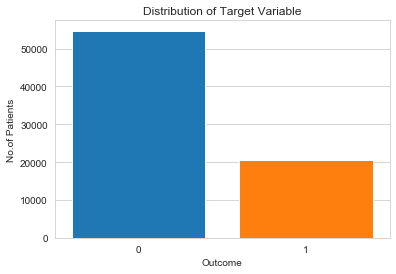

In [118]:
sns.countplot(x = 'Outcome',data = data, order = data['Outcome'].value_counts().index, saturation = 1).set_title('Distribution of Target Variable')
plt.ylabel("No.of Patients");

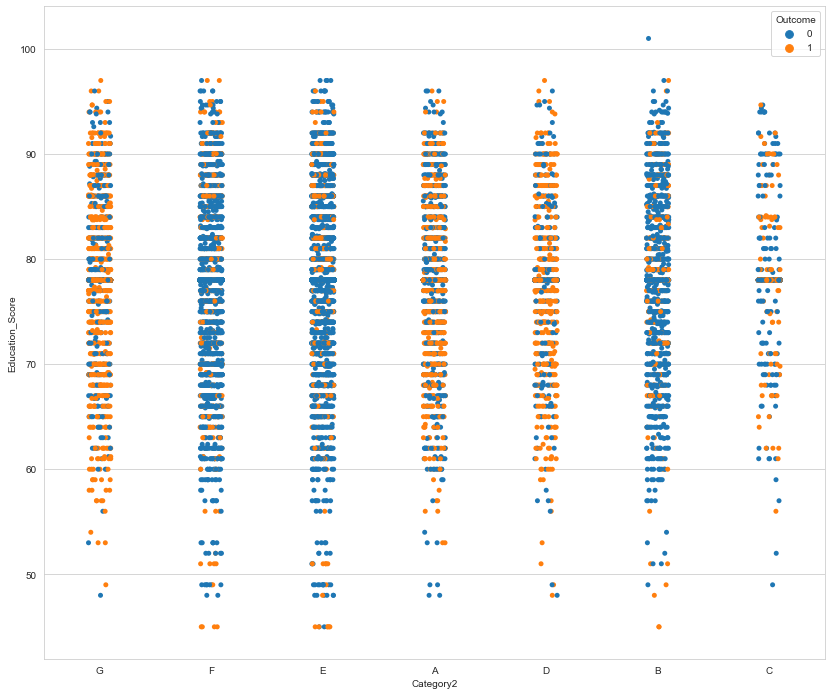

In [119]:
plt.figure(figsize=(14,12))
g = sns.stripplot(x = 'Category2',y = 'Education_Score', hue='Outcome',data = data);

In [120]:
map_category2 = {"G": 1, "A": 1, "D": 1}

for dataset in data:
    data['category2_map'] = data['Category2'].map(map_category2)

In [121]:
map_category2 = {"G": 1, "A": 1, "D": 1}

for dataset in Test:
    Test['category2_map'] = Test['Category2'].map(map_category2)

In [122]:
data.isnull().sum()

Var1                 0    
Var2                 0    
Var3                 0    
Var4                 0    
Var5                 0    
Online_Follower      0    
LinkedIn_Shared      0    
Twitter_Shared       0    
Facebook_Shared      0    
Income               0    
Education_Score      0    
Age                  0    
City_Type            0    
Employer_Category    0    
Category1            0    
Category2            0    
Category3            0    
Outcome              0    
Total_camp_days      0    
camp_month           0    
camp_year            0    
category2_map        49892
dtype: int64

In [123]:
data['category2_map'] = data['category2_map'].replace(np.nan, 0)

Test['category2_map'] = Test['category2_map'].replace(np.nan, 0) 

In [124]:
data['category2_map'] = data['category2_map'].astype('category')

Test['category2_map'] = Test['category2_map'].astype('category')

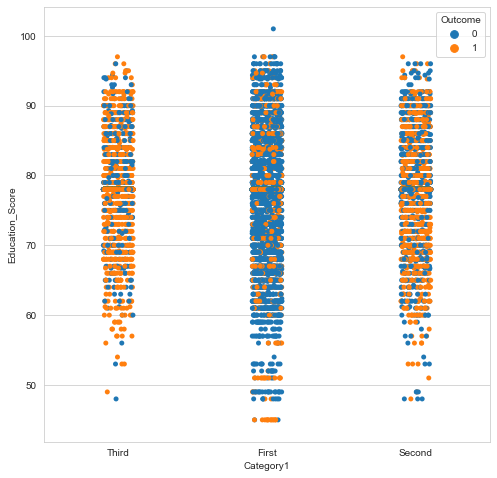

In [125]:
plt.figure(figsize=(8,8))
g = sns.stripplot(x = 'Category1',y = 'Education_Score', hue='Outcome',data = data);

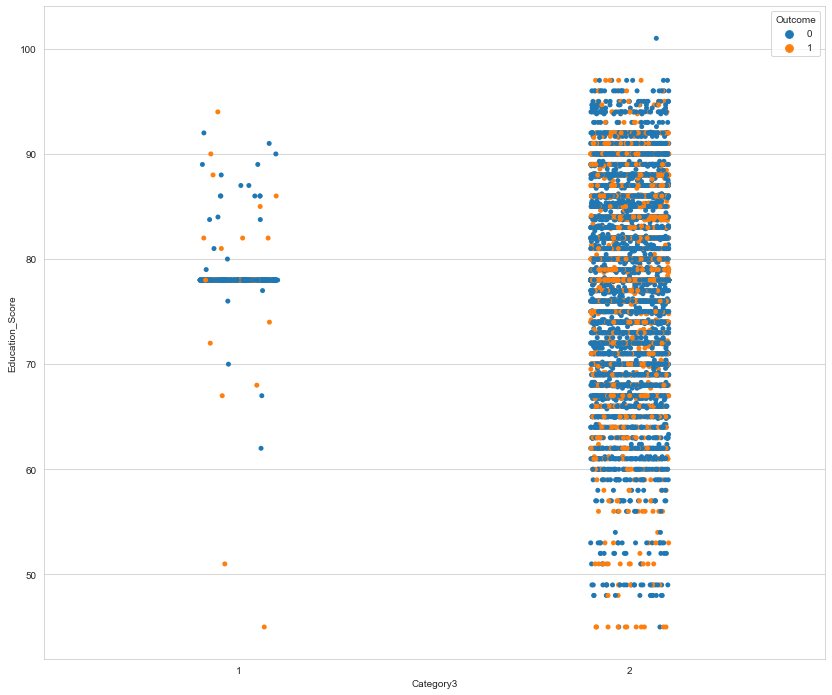

In [126]:
plt.figure(figsize=(14,12))
g = sns.stripplot(x = 'Category3',y = 'Education_Score', hue='Outcome',data = data);

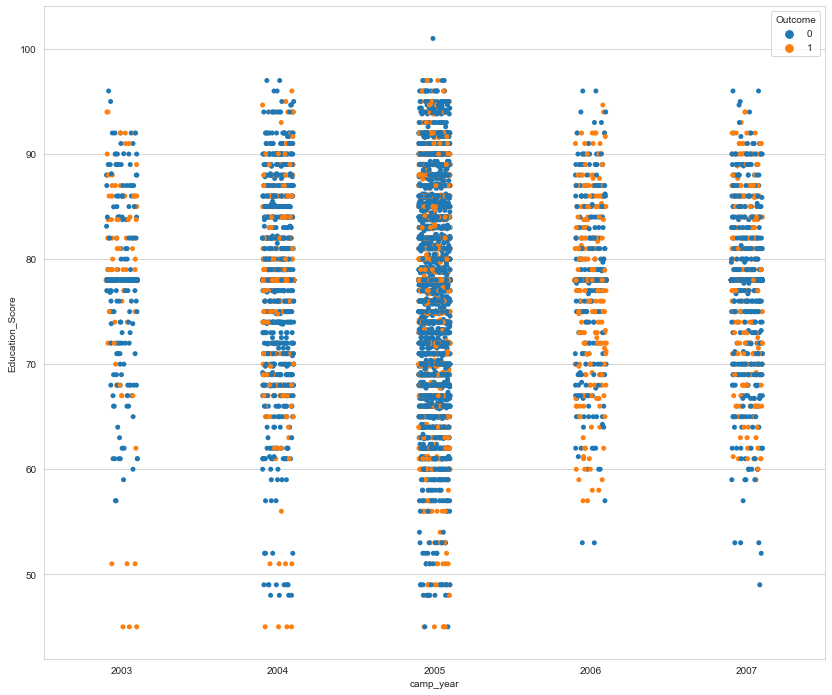

In [127]:
plt.figure(figsize=(14,12))
g = sns.stripplot(x = 'camp_year',y = 'Education_Score', hue='Outcome',data = data);

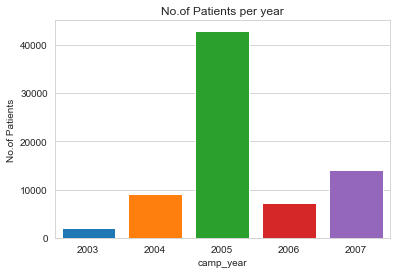

In [128]:
sns.countplot(x = 'camp_year',data = data, saturation = 1).set_title('No.of Patients per year')
plt.ylabel("No.of Patients");

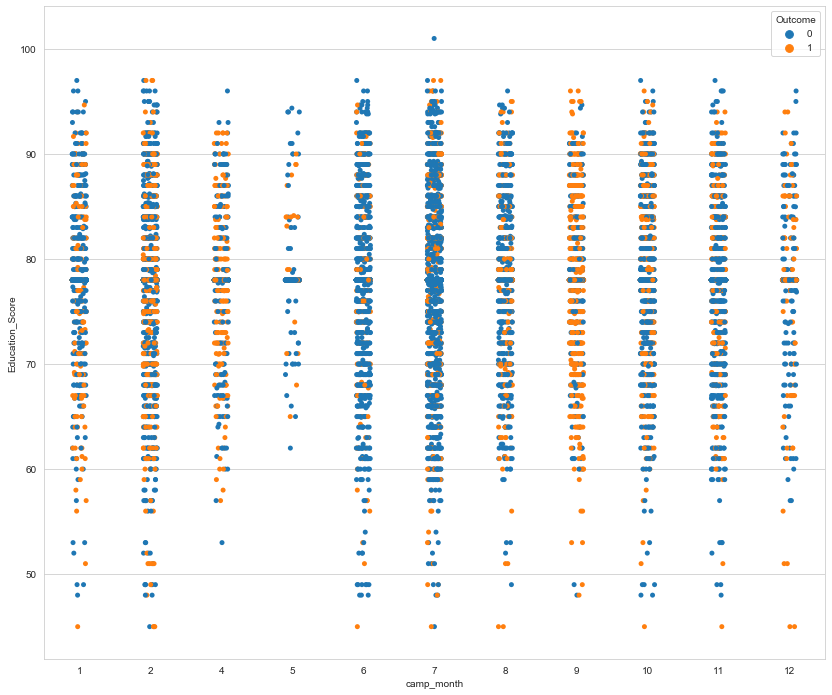

In [129]:
plt.figure(figsize=(14,12))
g = sns.stripplot(x = 'camp_month',y = 'Education_Score', hue='Outcome',data = data);

In [130]:
map_month = {1: 1, 2: 1, 4: 1,
             5 : 2, 6: 2, 7: 2,
             8: 4, 9: 3,
             10: 4, 11: 4, 12: 4}

for dataset in data:
    data['month_map'] = data['camp_month'].map(map_month)

In [131]:
map_month = {3: 1, 2: 1, 4: 1,
             7: 2,
             8: 4, 9: 3,
             11: 4, 12: 4}

for dataset in Test:
    Test['month_map'] = Test['camp_month'].map(map_month)

In [132]:
data['month_map'] = data['month_map'].astype('category')
Test['month_map'] = Test['month_map'].astype('category')  

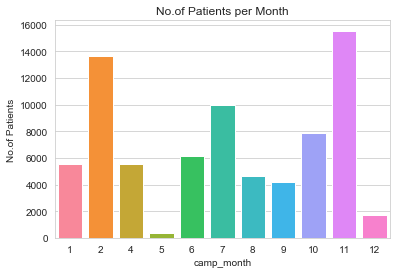

In [133]:
sns.countplot(x = 'camp_month',data = data, saturation = 1).set_title('No.of Patients per Month')
plt.ylabel("No.of Patients");

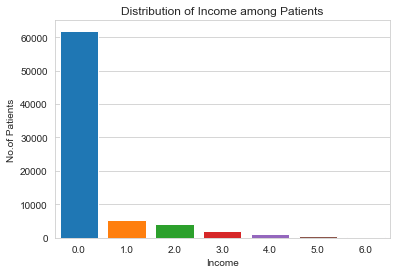

In [134]:
sns.countplot(x = 'Income',data = data, saturation = 1).set_title('Distribution of Income among Patients')
plt.ylabel("No.of Patients");

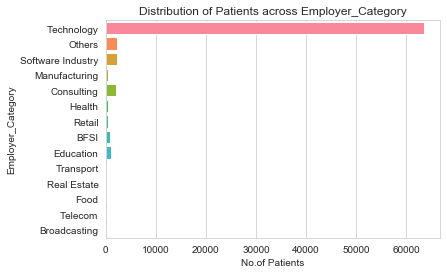

In [135]:
sns.countplot(y = 'Employer_Category',data = data, saturation = 1).set_title('Distribution of Patients across Employer_Category')
plt.xlabel("No.of Patients");
plt.ylabel("Employer_Category");

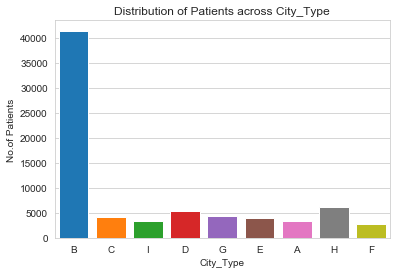

In [136]:
sns.countplot(x = 'City_Type',data = data, saturation = 1).set_title('Distribution of Patients across City_Type')
plt.ylabel("No.of Patients");
plt.xlabel("City_Type");

In [137]:
map_city = {"B": 'B'}

for dataset in data:
    data['city_map'] = data['City_Type'].map(map_city)

In [138]:
map_city = {"B": 'B'}

for dataset in Test:
    Test['city_map'] = Test['City_Type'].map(map_city)

In [139]:
data['city_map'] = data['city_map'].replace(np.nan, 'other')

Test['city_map'] = Test['city_map'].replace(np.nan, 'other') 

In [140]:
data['city_map'] = data['city_map'].astype('category')
Test['city_map'] = Test['city_map'].astype('category')  

In [141]:
data['Total_camp_days'].nunique()

25

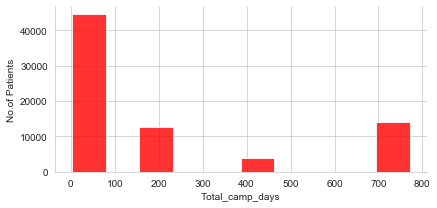

In [142]:
g=sns.FacetGrid(data=data, aspect = 2)
g.map(plt.hist,'Total_camp_days', color = 'r', alpha=0.8)
plt.ylabel("No.of Patients");

In [143]:
days_bin = [0,100,300,500,800]
days_labels = [1,2,3,4]
data['camp_days_bin'] = pd.cut(data['Total_camp_days'],bins = days_bin,labels = days_labels)

In [144]:
days_bin = [0,100,300,500,800]
days_labels = [1,2,3,4]
Test['camp_days_bin'] = pd.cut(Test['Total_camp_days'],bins = days_bin,labels = days_labels)

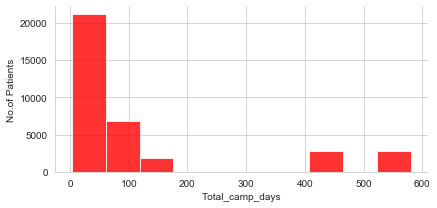

In [145]:
g=sns.FacetGrid(data=Test, aspect = 2)
g.map(plt.hist,'Total_camp_days', color = 'r', alpha=0.8)
plt.ylabel("No.of Patients");

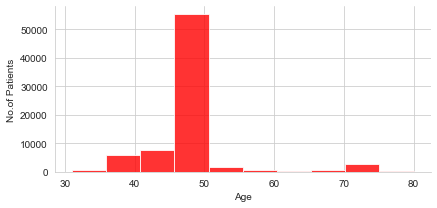

In [146]:
g=sns.FacetGrid(data=data, aspect = 2)
g.map(plt.hist,'Age', color = 'r', alpha=0.8)
plt.ylabel("No.of Patients");

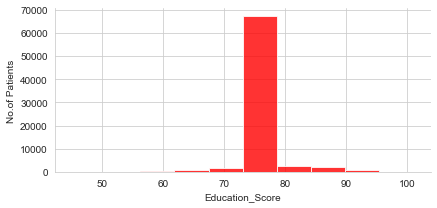

In [147]:
g=sns.FacetGrid(data=data, aspect = 2)
g.map(plt.hist,'Education_Score', color = 'r', alpha=0.8)
plt.ylabel("No.of Patients");

In [148]:
data['Total_Var'] = data['Var1'] + data['Var2'] + data['Var3'] + data['Var4'] + data['Var5']

In [149]:
Test['Total_Var'] = Test['Var1'] + Test['Var2'] + Test['Var3'] + Test['Var4'] + Test['Var5']

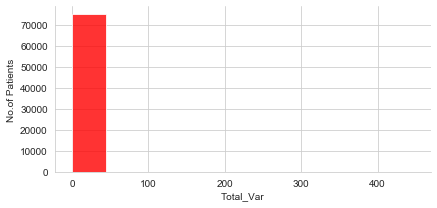

In [150]:
g = sns.FacetGrid(data=data, aspect = 2)
g.map(plt.hist,'Total_Var', color = 'r', alpha=0.8)
plt.ylabel("No.of Patients");

In [151]:
result = [] 
for value in data["Total_Var"]: 
    if value > 0: 
        result.append("yes") 
     
    else: 
        result.append("no") 
data["Var"] = result     

In [152]:
result = [] 
for value in Test["Total_Var"]: 
    if value > 0: 
        result.append("yes") 
     
    else: 
        result.append("no") 
Test["Var"] = result   

In [153]:
data['Var'] = data['Var'].astype('category')

In [154]:
Test['Var'] = Test['Var'].astype('category')

In [155]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Var1,75278.0,0.796156,7.626687,0.0,0.0,0.0,0.0,288.0
Var2,75278.0,0.238556,3.769594,0.0,0.0,0.0,0.0,156.0
Var3,75278.0,0.000385,0.019624,0.0,0.0,0.0,0.0,1.0
Var4,75278.0,0.022424,0.199570,0.0,0.0,0.0,0.0,4.0
Var5,75278.0,0.248386,1.213938,0.0,0.0,0.0,0.0,31.0
Income,75278.0,0.370613,0.947590,0.0,0.0,0.0,0.0,6.0
Education_Score,75278.0,77.995012,3.252051,45.0,78.0,78.0,78.0,101.0
Age,75278.0,47.970469,6.480002,31.0,48.0,48.0,48.0,80.0
Total_camp_days,75278.0,208.951274,283.242511,2.0,13.0,48.0,205.0,771.0
Total_Var,75278.0,1.305906,11.985142,0.0,0.0,0.0,0.0,447.0


In [156]:
Test.describe().T

,count,mean,std,min,25%,50%,75%,max
Var1,35249.0,0.819201,8.298817,0.0,0.0,0.0,0.0,344.0
Var2,35249.0,0.253312,3.984690,0.0,0.0,0.0,0.0,181.0
Var3,35249.0,0.000567,0.023814,0.0,0.0,0.0,0.0,1.0
Var4,35249.0,0.041845,0.268826,0.0,0.0,0.0,0.0,8.0
Var5,35249.0,0.258163,1.311230,0.0,0.0,0.0,0.0,34.0
Income,35249.0,0.222162,0.744042,0.0,0.0,0.0,0.0,6.0
Education_Score,35249.0,77.967503,2.274301,48.0,78.0,78.0,78.0,97.0
Age,35249.0,48.256149,6.541988,30.0,48.0,48.0,48.0,78.0
Total_camp_days,35249.0,107.290987,179.934112,3.0,5.0,9.0,98.0,580.0
Total_Var,35249.0,1.373089,13.080520,0.0,0.0,0.0,0.0,474.0


In [157]:
age = [0,40,50,80]
age_labels = ['young','old','very_Old']
data['age_bin'] = pd.cut(data['Age'],bins = age,labels = age_labels)

In [158]:
age = [0,40,50,80]
age_labels = ['young','old','very_Old']
Test['age_bin'] = pd.cut(Test['Age'],bins = age,labels = age_labels)

In [159]:
print(data.shape)
for i in data.columns.values:
    print (i)
    print (len(data[i].unique()))
    print("----------")

(75278, 28)
Var1
127
----------
Var2
77
----------
Var3
2
----------
Var4
5
----------
Var5
30
----------
Online_Follower
2
----------
LinkedIn_Shared
2
----------
Twitter_Shared
2
----------
Facebook_Shared
2
----------
Income
7
----------
Education_Score
227
----------
Age
49
----------
City_Type
9
----------
Employer_Category
14
----------
Category1
3
----------
Category2
7
----------
Category3
2
----------
Outcome
2
----------
Total_camp_days
25
----------
camp_month
11
----------
camp_year
5
----------
category2_map
2
----------
month_map
4
----------
city_map
2
----------
camp_days_bin
4
----------
Total_Var
170
----------
Var
2
----------
age_bin
3
----------


In [160]:
print(Test.shape)
for i in Test.columns.values:
    print (i)
    print (len(Test[i].unique()))
    print("----------")

(35249, 27)
Var1
92
----------
Var2
69
----------
Var3
2
----------
Var4
8
----------
Var5
30
----------
Online_Follower
2
----------
LinkedIn_Shared
2
----------
Twitter_Shared
2
----------
Facebook_Shared
2
----------
Income
7
----------
Education_Score
91
----------
Age
49
----------
City_Type
9
----------
Employer_Category
14
----------
Category1
3
----------
Category2
6
----------
Category3
1
----------
Total_camp_days
14
----------
camp_month
8
----------
camp_year
2
----------
category2_map
2
----------
month_map
4
----------
city_map
2
----------
camp_days_bin
4
----------
Total_Var
130
----------
Var
2
----------
age_bin
3
----------


#### Visualization of Numerical attributes

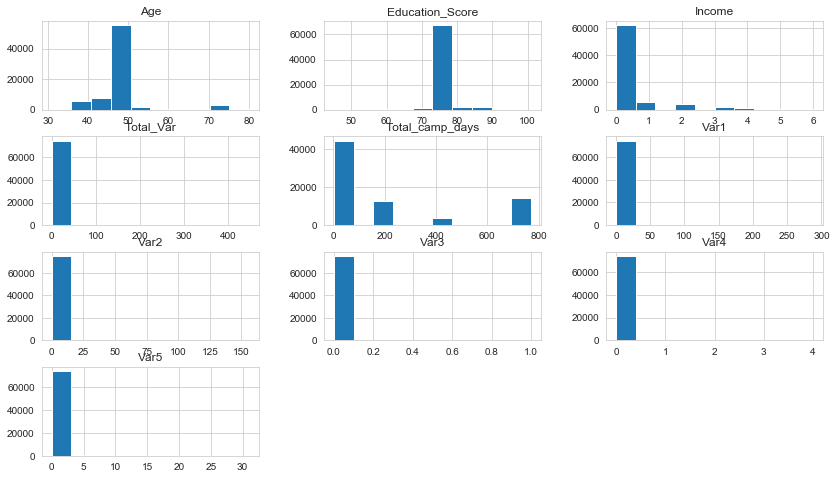

In [161]:
fig = plt.figure(figsize = (14,8))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

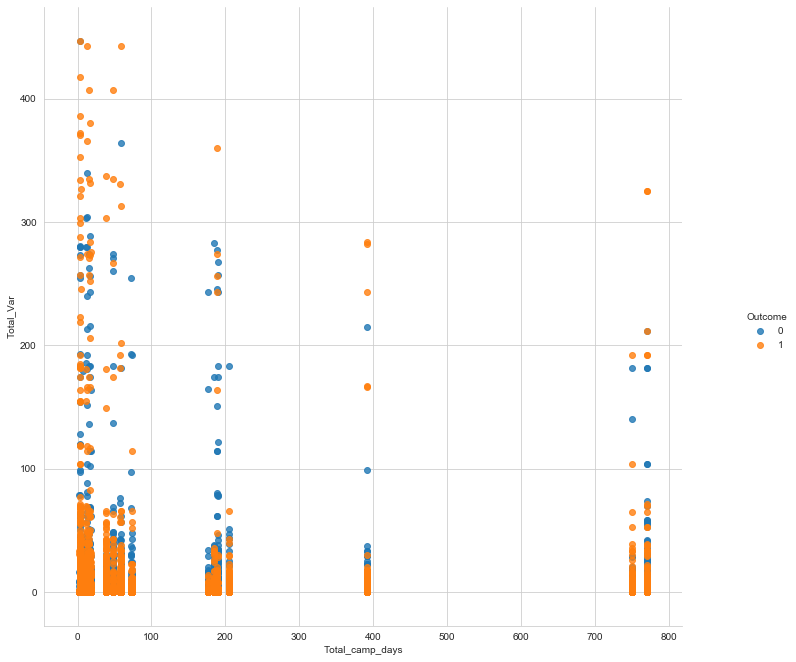

In [162]:
sns.lmplot('Total_camp_days', 'Total_Var', data, hue='Outcome', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.show()

In [163]:
data.drop(['camp_month', 'camp_year', 'Category3', 'Category2'], axis = 1, inplace = True)

In [164]:
Test.drop(['camp_month', 'camp_year', 'Category3', 'Category2'], axis = 1, inplace = True)

In [165]:
data.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Online_Follower',
       'LinkedIn_Shared', 'Twitter_Shared', 'Facebook_Shared', 'Income',
       'Education_Score', 'Age', 'City_Type', 'Employer_Category', 'Category1',
       'Outcome', 'Total_camp_days', 'category2_map', 'month_map', 'city_map',
       'camp_days_bin', 'Total_Var', 'Var', 'age_bin'],
      dtype='object')

In [166]:
cat_cols = ['city_map', 'month_map', 'Category1', 'category2_map', 'camp_days_bin']

In [167]:
data.drop(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Education_Score', 'Online_Follower', 'City_Type',
            'Income', 'LinkedIn_Shared', 'Twitter_Shared', 'Age', 'Facebook_Shared', 'age_bin',
           'Employer_Category', 'Total_camp_days', 'Var'], axis = 1, inplace = True)

In [168]:
Test.drop(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Education_Score', 'Online_Follower', 'City_Type',
            'Income', 'LinkedIn_Shared', 'Twitter_Shared', 'Age', 'Facebook_Shared', 'age_bin',
           'Employer_Category', 'Total_camp_days', 'Var'], axis = 1, inplace = True)

### Train-Validation Split

In [169]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(data, test_size = 0.3, random_state = 1234)


In [170]:
print("Shape of training set:", train.shape)
print("Shape of validation set:", valid.shape)
print("Shape of test set:", Test.shape)

Shape of training set: (52694, 7)
Shape of validation set: (22584, 7)
Shape of test set: (35249, 6)


**Separating the dependent and independent variables**

In [171]:
x_train = train.drop('Outcome', axis = 1)
y_train = train['Outcome']

x_valid = valid.drop('Outcome', axis = 1)
y_valid = valid['Outcome']

In [172]:
x_train = pd.get_dummies(x_train, columns = cat_cols, drop_first = True)
x_valid = pd.get_dummies(x_valid, columns = cat_cols, drop_first = True) 
x_test =  pd.get_dummies(Test, columns = cat_cols, drop_first = True) 

In [173]:
print(x_train.shape)

print(x_valid.shape)

print(x_test.shape)

(52694, 11)
(22584, 11)
(35249, 11)


In [174]:
x_train.head(2)

,Total_Var,city_map_other,month_map_2,month_map_3,month_map_4,Category1_Second,Category1_Third,category2_map_1.0,camp_days_bin_2,camp_days_bin_3,camp_days_bin_4
PHC_ID,,,,,,,,,,,
517303-6526,0,1,0,0,0,0,0,0,0,0,0
502454-6534,0,0,0,0,1,1,0,1,0,0,1


In [175]:
x_test.head(2)

,Total_Var,city_map_other,month_map_2.0,month_map_3.0,month_map_4.0,Category1_Second,Category1_Third,category2_map_1.0,camp_days_bin_2,camp_days_bin_3,camp_days_bin_4
PHC_ID,,,,,,,,,,,
505701-6548,3.0,1,0,0,1,0,1,1,0,0,0
500633-6548,0.0,1,0,0,1,0,1,1,0,0,0


### Feature Scaling

In [176]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_valid = sc.transform(x_valid) 

x_Test = sc.transform(x_test)  


In [177]:
x_train[1]

array([-0.11032361, -0.90047355, -0.53253314, -0.24141759,  1.2359339 ,
        1.99701595, -0.39759834,  1.40267807, -0.45317881, -0.23402137,
        2.09250694])

### Model Building

In [178]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#### Logistic Regression

In [179]:
# we define 2 list that one of them save results(F1-Macro avg) of models other list save name of model

labelList = []
resultList = []

In [180]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 1)

LR.fit(x_train, y_train)

y_pred_LR_train = LR.predict(x_train)
y_pred_LR_valid = LR.predict(x_valid)
y_pred_LR_test = LR.predict(x_test) 

f1_lr_train = f1_score(y_train, y_pred_LR_train, average = 'macro')
f1_lr_valid = f1_score(y_valid, y_pred_LR_valid, average = 'macro')

print('Train F1 Macro')
print(f1_lr_train * 100)

print('======================')

print('Validation F1 Macro')
print(f1_lr_valid * 100)

# adding result and label to lists

labelList.append("LR")
resultList.append(f1_lr_valid)

Train F1 Macro
73.29587770138927
Validation F1 Macro
72.74451322738594


In [181]:
def LR_model_evaluation(y_train, y_pred_LR_train, y_valid, y_LR_KNN_valid) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, y_pred_LR_train))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================''')
    print(classification_report(y_valid, y_pred_LR_valid)) 

In [182]:
LR_model_evaluation(y_train, y_pred_LR_train, y_valid, y_pred_LR_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     38342
           1       0.61      0.61      0.61     14352

    accuracy                           0.79     52694
   macro avg       0.73      0.73      0.73     52694
weighted avg       0.79      0.79      0.79     52694


               CLASSIFICATION REPORT FOR VALIDATION DATA
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     16402
           1       0.61      0.60      0.60      6182

    accuracy                           0.78     22584
   macro avg       0.73      0.73      0.73     22584
weighted avg       0.78      0.78      0.78     22584



In [183]:
LR_prediction = y_pred_LR_test

submission = pd.DataFrame({"Patient_ID": submission["Patient_ID"],
                           'Health_Camp_ID': submission['Health_Camp_ID'],
                           "Outcome": LR_prediction})

submission.to_csv('sub_LR.csv',index=False)

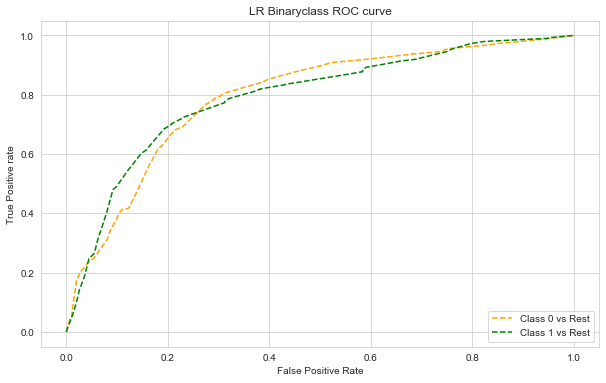

In [184]:
pred_prob = LR.predict_proba(x_valid)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_valid, pred_prob[:,i], pos_label=i)
    
# plotting    

fig = plt.figure(figsize = (10,6))

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('LR Binaryclass ROC curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right');

In [185]:
pos_probs = pred_prob[:, 1]

In [186]:
# calculate roc auc

roc_auc = roc_auc_score(y_valid, pos_probs)

In [187]:
roc_auc

0.7933275234403991

#### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
RF = RandomForestClassifier(random_state = 1)

RF.fit(x_train, y_train)

y_pred_RF_train = RF.predict(x_train)
y_pred_RF_valid = RF.predict(x_valid)
y_pred_RF_test = RF.predict(x_test)

f1_RF_train = f1_score(y_train, y_pred_RF_train, average = 'macro')
f1_RF_valid = f1_score(y_valid, y_pred_RF_valid, average = 'macro')

print('Train F1 Macro')
print(f1_RF_train * 100)

print('======================')

print('Validation F1 Macro')
print(f1_RF_valid * 100)

# adding result and label to lists

labelList.append("RF")
resultList.append(f1_RF_valid)

Train F1 Macro
72.6424913725301
Validation F1 Macro
71.10750938311992


In [190]:
def RF_model_evaluation(y_train, y_pred_RF_train, y_valid, y_pred_RF_valid) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, y_pred_RF_train))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================''')
    print(classification_report(y_valid, y_pred_RF_valid)) 

In [191]:
RF_model_evaluation(y_train, y_pred_RF_train, y_valid, y_pred_RF_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     38342
           1       0.69      0.50      0.58     14352

    accuracy                           0.80     52694
   macro avg       0.76      0.71      0.73     52694
weighted avg       0.79      0.80      0.79     52694


               CLASSIFICATION REPORT FOR VALIDATION DATA
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     16402
           1       0.67      0.48      0.56      6182

    accuracy                           0.79     22584
   macro avg       0.75      0.69      0.71     22584
weighted avg       0.78      0.79      0.78     22584



In [192]:
RF_prediction = y_pred_RF_test

submission = pd.DataFrame({"Patient_ID": submission["Patient_ID"],
                           'Health_Camp_ID': submission['Health_Camp_ID'],
                           "Outcome": RF_prediction})

submission.to_csv('sub_RF.csv',index=False)

In [193]:
RF_tuned=RandomForestClassifier(criterion = 'gini', max_depth = 8,
                                min_samples_leaf = 2, min_samples_split = 4, random_state = 88)

RF_tuned.fit(x_train,y_train)

y_pred_RF_tuned_train =RF_tuned.predict(x_train)

y_pred_RF_tuned_valid =RF_tuned.predict(x_valid)

y_pred_RF_tuned_test = RF_tuned.predict(x_test)

f1_rf_tuned_train = f1_score(y_train, y_pred_RF_tuned_train, average='macro')
f1_rf_tuned_valid = f1_score(y_valid, y_pred_RF_tuned_valid, average='macro')

print('Train F1 Macro')
print(f1_rf_tuned_train*100)

print('====================')

print('Validation F1 Macro')
print(f1_rf_tuned_valid*100)

# adding result and label to lists

labelList.append("RF Tuned")
resultList.append(f1_rf_tuned_valid)

Train F1 Macro
72.14429018741468
Validation F1 Macro
71.23180377909378


In [194]:
print(RF_tuned.feature_importances_)

[0.04703402 0.03400227 0.01742207 0.0460631  0.02498338 0.14079586
 0.18675539 0.44908731 0.02931574 0.00349628 0.02104456]


#### CatBoost

In [195]:
from catboost import CatBoostClassifier
import catboost as cb

In [196]:
CB = CatBoostClassifier()

CB.fit(x_train,y_train)

y_pred_CB_train = CB.predict(x_train)
y_pred_CB_valid = CB.predict(x_valid)

f1_cb_train = f1_score(y_train, y_pred_CB_train, average = 'macro')
f1_cb_valid = f1_score(y_valid, y_pred_CB_valid, average = 'macro')

Learning rate set to 0.055992
0:	learn: 0.6640228	total: 79.7ms	remaining: 1m 19s
1:	learn: 0.6380200	total: 103ms	remaining: 51.1s
2:	learn: 0.6164187	total: 123ms	remaining: 41s
3:	learn: 0.5967197	total: 143ms	remaining: 35.5s
4:	learn: 0.5791293	total: 163ms	remaining: 32.4s
5:	learn: 0.5646001	total: 183ms	remaining: 30.4s
6:	learn: 0.5521937	total: 198ms	remaining: 28.2s
7:	learn: 0.5403902	total: 219ms	remaining: 27.2s
8:	learn: 0.5301815	total: 241ms	remaining: 26.5s
9:	learn: 0.5218661	total: 258ms	remaining: 25.5s
10:	learn: 0.5136311	total: 274ms	remaining: 24.6s
11:	learn: 0.5066212	total: 294ms	remaining: 24.2s
12:	learn: 0.5005972	total: 317ms	remaining: 24.1s
13:	learn: 0.4954908	total: 334ms	remaining: 23.5s
14:	learn: 0.4907536	total: 354ms	remaining: 23.2s
15:	learn: 0.4866261	total: 371ms	remaining: 22.8s
16:	learn: 0.4831342	total: 391ms	remaining: 22.6s
17:	learn: 0.4796365	total: 412ms	remaining: 22.5s
18:	learn: 0.4770299	total: 436ms	remaining: 22.5s
19:	learn: 

160:	learn: 0.4465775	total: 3.41s	remaining: 17.8s
161:	learn: 0.4465701	total: 3.43s	remaining: 17.7s
162:	learn: 0.4465519	total: 3.45s	remaining: 17.7s
163:	learn: 0.4465380	total: 3.46s	remaining: 17.7s
164:	learn: 0.4465264	total: 3.48s	remaining: 17.6s
165:	learn: 0.4464943	total: 3.5s	remaining: 17.6s
166:	learn: 0.4464936	total: 3.51s	remaining: 17.5s
167:	learn: 0.4464856	total: 3.53s	remaining: 17.5s
168:	learn: 0.4464783	total: 3.55s	remaining: 17.5s
169:	learn: 0.4464578	total: 3.58s	remaining: 17.5s
170:	learn: 0.4464306	total: 3.6s	remaining: 17.4s
171:	learn: 0.4464224	total: 3.62s	remaining: 17.4s
172:	learn: 0.4464154	total: 3.63s	remaining: 17.4s
173:	learn: 0.4463915	total: 3.66s	remaining: 17.4s
174:	learn: 0.4463890	total: 3.67s	remaining: 17.3s
175:	learn: 0.4463766	total: 3.69s	remaining: 17.3s
176:	learn: 0.4463538	total: 3.71s	remaining: 17.3s
177:	learn: 0.4463481	total: 3.73s	remaining: 17.2s
178:	learn: 0.4463423	total: 3.75s	remaining: 17.2s
179:	learn: 0.

325:	learn: 0.4445584	total: 6.56s	remaining: 13.6s
326:	learn: 0.4445526	total: 6.58s	remaining: 13.5s
327:	learn: 0.4445458	total: 6.6s	remaining: 13.5s
328:	learn: 0.4445427	total: 6.62s	remaining: 13.5s
329:	learn: 0.4445241	total: 6.64s	remaining: 13.5s
330:	learn: 0.4445038	total: 6.66s	remaining: 13.5s
331:	learn: 0.4445034	total: 6.68s	remaining: 13.4s
332:	learn: 0.4444945	total: 6.7s	remaining: 13.4s
333:	learn: 0.4444781	total: 6.72s	remaining: 13.4s
334:	learn: 0.4444710	total: 6.74s	remaining: 13.4s
335:	learn: 0.4444608	total: 6.76s	remaining: 13.4s
336:	learn: 0.4444452	total: 6.78s	remaining: 13.3s
337:	learn: 0.4444416	total: 6.8s	remaining: 13.3s
338:	learn: 0.4444376	total: 6.82s	remaining: 13.3s
339:	learn: 0.4444342	total: 6.84s	remaining: 13.3s
340:	learn: 0.4444328	total: 6.86s	remaining: 13.3s
341:	learn: 0.4444203	total: 6.88s	remaining: 13.2s
342:	learn: 0.4444006	total: 6.9s	remaining: 13.2s
343:	learn: 0.4443887	total: 6.92s	remaining: 13.2s
344:	learn: 0.44

486:	learn: 0.4432742	total: 9.92s	remaining: 10.4s
487:	learn: 0.4432742	total: 9.95s	remaining: 10.4s
488:	learn: 0.4432667	total: 9.99s	remaining: 10.4s
489:	learn: 0.4432461	total: 10s	remaining: 10.4s
490:	learn: 0.4432290	total: 10s	remaining: 10.4s
491:	learn: 0.4432235	total: 10.1s	remaining: 10.4s
492:	learn: 0.4432184	total: 10.1s	remaining: 10.4s
493:	learn: 0.4432037	total: 10.1s	remaining: 10.3s
494:	learn: 0.4431862	total: 10.1s	remaining: 10.3s
495:	learn: 0.4431768	total: 10.1s	remaining: 10.3s
496:	learn: 0.4431728	total: 10.2s	remaining: 10.3s
497:	learn: 0.4431674	total: 10.2s	remaining: 10.3s
498:	learn: 0.4431609	total: 10.2s	remaining: 10.2s
499:	learn: 0.4431583	total: 10.2s	remaining: 10.2s
500:	learn: 0.4431456	total: 10.2s	remaining: 10.2s
501:	learn: 0.4431373	total: 10.3s	remaining: 10.2s
502:	learn: 0.4431373	total: 10.3s	remaining: 10.2s
503:	learn: 0.4431373	total: 10.3s	remaining: 10.1s
504:	learn: 0.4431327	total: 10.3s	remaining: 10.1s
505:	learn: 0.44

651:	learn: 0.4423241	total: 13.1s	remaining: 7.01s
652:	learn: 0.4423106	total: 13.2s	remaining: 6.99s
653:	learn: 0.4423016	total: 13.2s	remaining: 6.97s
654:	learn: 0.4422931	total: 13.2s	remaining: 6.95s
655:	learn: 0.4422891	total: 13.2s	remaining: 6.93s
656:	learn: 0.4422837	total: 13.2s	remaining: 6.91s
657:	learn: 0.4422776	total: 13.3s	remaining: 6.89s
658:	learn: 0.4422749	total: 13.3s	remaining: 6.87s
659:	learn: 0.4422679	total: 13.3s	remaining: 6.85s
660:	learn: 0.4422643	total: 13.3s	remaining: 6.83s
661:	learn: 0.4422545	total: 13.3s	remaining: 6.81s
662:	learn: 0.4422492	total: 13.3s	remaining: 6.79s
663:	learn: 0.4422409	total: 13.4s	remaining: 6.76s
664:	learn: 0.4422405	total: 13.4s	remaining: 6.74s
665:	learn: 0.4422383	total: 13.4s	remaining: 6.72s
666:	learn: 0.4422260	total: 13.4s	remaining: 6.7s
667:	learn: 0.4422256	total: 13.4s	remaining: 6.68s
668:	learn: 0.4422109	total: 13.5s	remaining: 6.66s
669:	learn: 0.4422100	total: 13.5s	remaining: 6.64s
670:	learn: 0

816:	learn: 0.4415685	total: 16.3s	remaining: 3.64s
817:	learn: 0.4415632	total: 16.3s	remaining: 3.62s
818:	learn: 0.4415614	total: 16.3s	remaining: 3.6s
819:	learn: 0.4415592	total: 16.3s	remaining: 3.58s
820:	learn: 0.4415553	total: 16.3s	remaining: 3.56s
821:	learn: 0.4415536	total: 16.4s	remaining: 3.54s
822:	learn: 0.4415504	total: 16.4s	remaining: 3.52s
823:	learn: 0.4415492	total: 16.4s	remaining: 3.5s
824:	learn: 0.4415418	total: 16.4s	remaining: 3.48s
825:	learn: 0.4415356	total: 16.4s	remaining: 3.46s
826:	learn: 0.4415328	total: 16.5s	remaining: 3.44s
827:	learn: 0.4415276	total: 16.5s	remaining: 3.42s
828:	learn: 0.4415214	total: 16.5s	remaining: 3.4s
829:	learn: 0.4415174	total: 16.5s	remaining: 3.38s
830:	learn: 0.4415099	total: 16.5s	remaining: 3.36s
831:	learn: 0.4415063	total: 16.6s	remaining: 3.34s
832:	learn: 0.4415013	total: 16.6s	remaining: 3.32s
833:	learn: 0.4414911	total: 16.6s	remaining: 3.3s
834:	learn: 0.4414865	total: 16.6s	remaining: 3.28s
835:	learn: 0.44

980:	learn: 0.4410195	total: 19.4s	remaining: 376ms
981:	learn: 0.4410125	total: 19.4s	remaining: 356ms
982:	learn: 0.4410094	total: 19.5s	remaining: 337ms
983:	learn: 0.4410077	total: 19.5s	remaining: 317ms
984:	learn: 0.4410002	total: 19.5s	remaining: 297ms
985:	learn: 0.4409996	total: 19.5s	remaining: 277ms
986:	learn: 0.4409981	total: 19.5s	remaining: 257ms
987:	learn: 0.4409911	total: 19.6s	remaining: 238ms
988:	learn: 0.4409902	total: 19.6s	remaining: 218ms
989:	learn: 0.4409872	total: 19.6s	remaining: 198ms
990:	learn: 0.4409823	total: 19.6s	remaining: 178ms
991:	learn: 0.4409812	total: 19.6s	remaining: 158ms
992:	learn: 0.4409786	total: 19.7s	remaining: 139ms
993:	learn: 0.4409645	total: 19.7s	remaining: 119ms
994:	learn: 0.4409620	total: 19.8s	remaining: 99.3ms
995:	learn: 0.4409614	total: 19.8s	remaining: 79.5ms
996:	learn: 0.4409576	total: 19.8s	remaining: 59.7ms
997:	learn: 0.4409538	total: 19.9s	remaining: 39.8ms
998:	learn: 0.4409505	total: 19.9s	remaining: 19.9ms
999:	le

In [197]:
print('Train F1 Macro')
print(f1_cb_train * 100)

print('====================')

print('Validation F1 Macro')
print(f1_cb_valid * 100)

# adding result and label to lists

labelList.append("CB")
resultList.append(f1_cb_valid)

Train F1 Macro
72.41578982871297
Validation F1 Macro
71.20980491222066


#### Confusion Matrix of Random-forest model

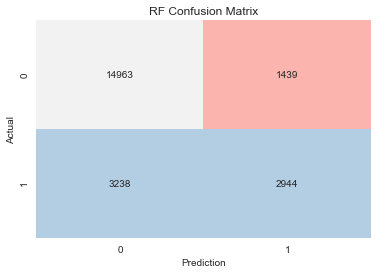

In [198]:
from sklearn.metrics import confusion_matrix

RF_matrix = confusion_matrix(y_valid, y_pred_RF_valid,labels=[0,1])

# heatmap to see confusion matrix

sns.heatmap(RF_matrix, cbar=False, annot=True, cmap='Pastel1',fmt='').set_title('RF Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual');

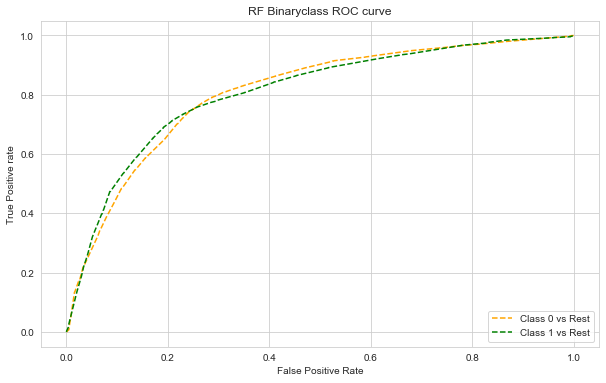

In [199]:
pred_prob = RF.predict_proba(x_valid)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_valid, pred_prob[:,i], pos_label=i)
    
# plotting    

fig = plt.figure(figsize = (10,6))

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('RF Binaryclass ROC curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='lower right');

In [200]:
# predict probabilities

pred_prob1 = LR.predict_proba(x_valid)
pred_prob2 = RF.predict_proba(x_valid)
pred_prob3 = CB.predict_proba(x_valid) 

In [201]:
# roc curve for models

fpr1, tpr1, thresh1 = roc_curve(y_valid, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_valid, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_valid, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 

random_probs = [0 for i in range(len(y_valid))]

p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

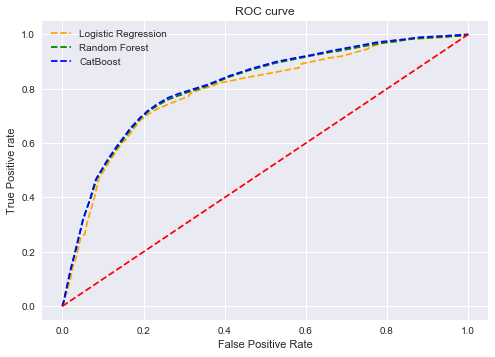

In [202]:
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='CatBoost')

plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [203]:
# First of all we combine 2 lists (labelList and resultList) by using zip method

zipped = zip(labelList, resultList)
zipped = list(zipped)

df = pd.DataFrame(zipped, columns=['label','F1 Macro'])
df.drop_duplicates(keep = 'first', inplace = True)

df

,label,F1 Macro
0,LR,0.727445
1,RF,0.711075
2,RF Tuned,0.712318
3,CB,0.712098


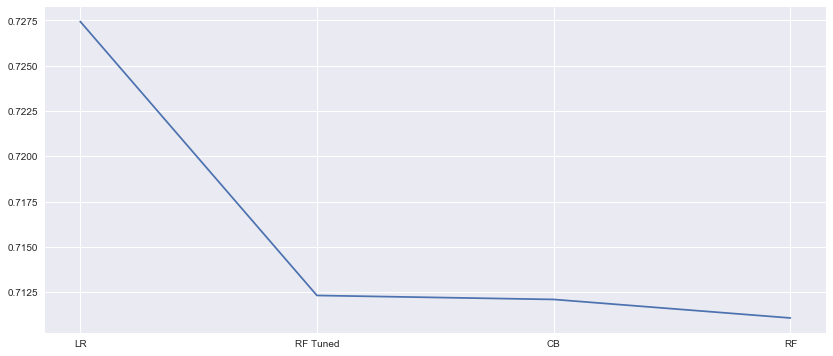

In [204]:
# Viewing this df table in form of graph
    
new_index = (df['F1 Macro'].sort_values(ascending=False)).index.values 
sorted_data = df.reindex(new_index)

fig = plt.figure(figsize = (14,6))

plt.plot(sorted_data.loc[:,"label"],sorted_data.loc[:,"F1 Macro"])
plt.show()

### Permutation Importance

In [205]:
import eli5
from eli5.sklearn import PermutationImportance

In [206]:
PI_LR = PermutationImportance(LR,random_state=44).fit(x_valid,y_valid)
eli5.show_weights(PI_LR)

Weight,Feature
0.0389 ± 0.0025,x6
0.0383 ± 0.0027,x7
0.0135 ± 0.0013,x5
0.0090 ± 0.0007,x10
0.0082 ± 0.0011,x4
0.0043 ± 0.0015,x2
0.0030 ± 0.0012,x3
0.0011 ± 0.0002,x0
0.0009 ± 0.0005,x9
0.0008 ± 0.0024,x1
